In [110]:
from numpy import sqrt, shape, array, exp, log, linspace, cos, sin
from random import random, randrange, uniform
from matplotlib.pyplot import plot, show, scatter, xlabel, ylabel, title, legend, figure, savefig
from math import pi

In [3]:
def distance(r1, r2): # calculates the distance modulus
    dis = sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)
    return dis

In [4]:
def energy(r):  # calculates the energy of a system of charged particles 
    N , a = shape(r)
    sum = 0
    for i in range(N):
        for j in range(N):
            if i!=j:
                dis = sqrt((r[i,0] - r[j,0])**2 + (r[i,1] - r[j,1])**2)
                sum+= 1/dis
    return sum/2

In [5]:
p = array([[0,0],[1,1]], float)
p
a,b=shape(p)
print(a,b, p[1,1])

2 2 1.0


In [6]:
energy(p)

0.7071067811865475

In [7]:
distance(p[0,:], p[1,:])

1.4142135623730951

In [8]:
def force(r, i):  # calculates force one of the particle feels from the rest
    N , a = shape(r)
    sum = 0
    for j in range(i):
        dis = distance(r[i,:], r[j,:])
        sum+= (r[i,:] - r[j,:])/dis**3
    for j in range(i+1, N):
        dis = distance(r[i,:], r[j,:])
        sum+= (r[i,:] - r[j,:])/dis**3
    return sum 

In [9]:
force(p, 0)

array([-0.35355339, -0.35355339])

We are going to make a change so that it only returns the force vector direction (normalized to unity).

In [75]:
def force_vector(r, i):  # calculates force vector direction one of the particle feels from the rest
    N , a = shape(r)
    sum = 0
    for j in range(i):
        dis = distance(r[i,:], r[j,:])
        sum+= r[i,:] - r[j,:]
    for j in range(i+1, N):
        dis = distance(r[i,:], r[j,:])
        sum+= r[i,:] - r[j,:]
    vec = sum/distance(sum, [0,0])
    return vec

In [76]:
force_vector(p, 0)

array([ 0.58578144, -0.81046907])

I have changed the function circle. Before it had a shape to act on whole position array. Now it only has a len so it can act individually on each particle.

In [86]:
def circle(r):
    N, a = shape(r)
    for i in range(N):
        dis = sqrt(r[i,0]**2 + r[i,1]**2)
        if dis<1.0:
            continue
        else:
            return False
    return True

In [87]:
def circle_ind(r):
    N = len(r)
    dis = sqrt(r[0]**2 + r[1]**2)
    if dis<1.0:
        return True
    else:
        return False

In [88]:
def random_step(r, c): 
    N, a = shape(r)  # r is the position of particles array
    for i in range(N):   # c is the amount we are willing to move the particle
        while True:
            for j in range(a):
                r[i,j]+= uniform(-c, c)
            if circle_ind(r[i,:])==True:
                break 
    return r

In [89]:
p = array([[0,0],[0.5,0.5]], float)
random_step(p,0.02)

array([[ 0.01543777, -0.01456644],
       [ 0.49266878,  0.51738879]])

In [99]:
def biased_step(r, c):
    # in this fucntion, the displacement of a particle is the combination of the force and stochastic noise
    N, a = shape(r)  # r is the position of particles array
    for i in range(N):   # c is the amount we are willing to move the particle
        while True:
            r[i,:]+= c*force_vector(r,i) + [uniform(-c, c), uniform(-c, c)]
            if circle_ind(r[i,:])==True:
                break 
    return r

In [104]:
biased_step(p, 0.01)

array([[-0.18246418, -0.20994513],
       [ 0.65846528,  0.73147082]])

In [101]:
def step_SA(r, T, niter_T, f, c):
    E = energy(r)
    for n in range(niter_T):
        r_step = f(r,c)
        E_step = energy(r_step)
        q = exp((E - E_step)/T)
        U = random()
        if U<q: 
            r = r_step
            E = E_step
    return r, E

In [54]:
r1,E1 = step_SA(p, 10, 100, random_step, 0.2)

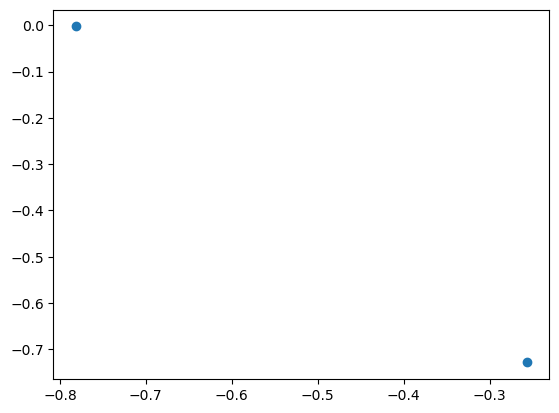

In [55]:
scatter(r1[:,0], r1[:,1])

In [60]:
def energy_opt(r0, Tmax, Tmin, tau, g, c, f, niter_T, maxiter):
    r = r0
    print(" la posicion inicial es ", r)
    E = energy(r0)
    t = 0
    T = Tmax
    while T>Tmin and t<maxiter:
        t+=1
        r, E = step_SA(r, T, niter_T, g, c)
        T = f(t, tau, Tmax)
        scatter(r[:,0], r[:,1])
    return r, E

In [61]:
def temp_exp(t, tau, Tmax):
    return Tmax*exp(-t/tau)

Analoga a la funcion de Marta y la del paper de multiplicar cada vez por cte.

In [68]:
def temp_power(t, tau, Tmax):
    return Tmax*(tau)**t

In [69]:
temp_power(10,0.9,100)

34.86784401000001

In [70]:
def temp_log(t, d, Tmax):
    return Tmax/log(t+d)

In [72]:
temp_log(10,0.9,100)

41.8626748753152

 la posicion inicial es  [[0.  0. ]
 [0.3 0.5]]


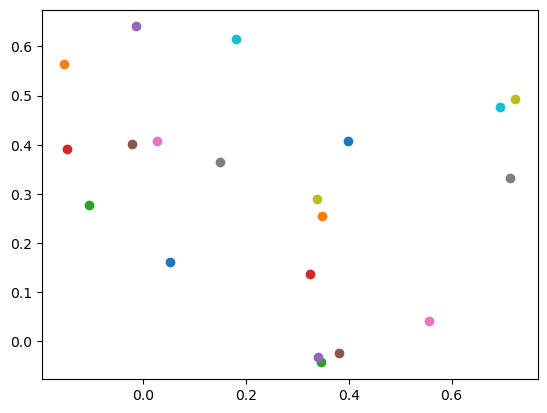

In [107]:
r0 = array([[0,0],[0.3, 0.5]], float)
Tmax = 10
Tmin = 1e-2
tau = 1000 
c = 0.1
niter_T = 10
maxiter = 10

r,E = energy_opt(r0, Tmax, Tmin, tau, random_step, c, temp_exp, niter_T, maxiter)

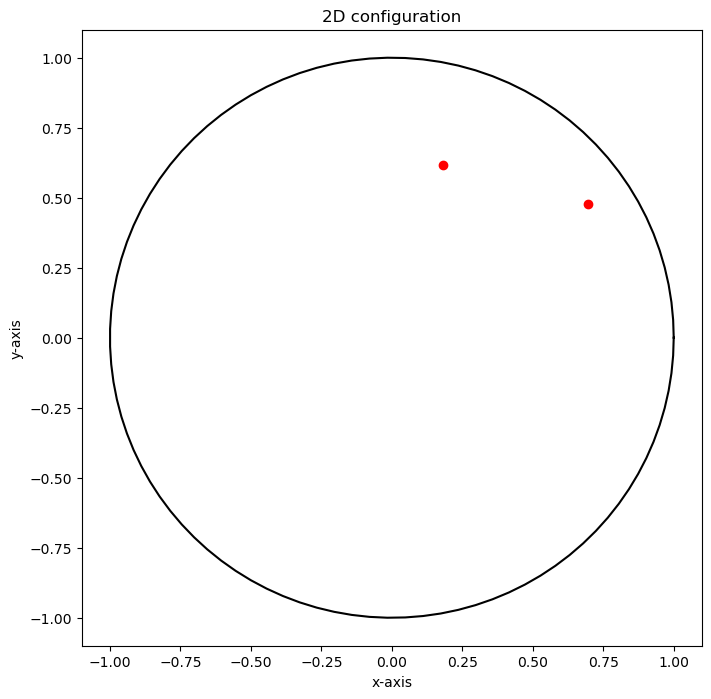

In [112]:
xaxis = []
yaxis = []

theta = linspace(0,2*pi,100)
for th in theta:
    xaxis.append(cos(th))
    yaxis.append(sin(th))

figure(figsize = (8,8))
plot(xaxis,yaxis,color = 'black')
scatter(r[:,0],r[:,1],color = 'red')
xlabel('x-axis')
ylabel('y-axis')
title('2D configuration')
#savefig(f'12 particles')
show()

In [121]:
def energy_opt2(r0, Tmax, Tmin, tau, f, b, maxiter):
    N, a = shape(r0)
    r = r0
    print(" la posicion inicial es ", r)
    E = energy(r0)
    t = 0
    T = Tmax
    step = 1
    while T>Tmin and step<maxiter:
        step+=1
        r_step = r
        z = randrange(N)
        print(z)
        r_step[z,:]+= force(r, z)*b
        print("old position is ", r)
        print("new position is ", r_step[z,:])
        E_step = energy(r) 
        print("las energias son" ,E, E_step)
        q = exp((E - E_step)/T)
        U = random()
        print(" U y q son ", U, q)
        print(step, circle(r_step), T)
        if U<q and circle(r_step)==True:
            r = r_step
            E = E_step
            t+=1
            T = f(t, tau, Tmax)
        else: 
            print("rejected")
            b/=2
            print("la b es ", b)
    return r, E

In [123]:
distance(r0[0,:], r0[1,:])
energy(r0)

0.2775007175783776

In [124]:
a=array([[0.7,0.7],[0.8,0.8]])
circle(a)

False

We have a problem. The r array does weird things. I suspect it is something with assignment variables.

In [125]:
r0 = array([[0,0],[0.3, 0.5]], float)
Tmax = 10
Tmin = 1e-2
tau = 10 
b = 1
maxiter = 1e2

energy_opt(r0, Tmax, Tmin, tau, temp, b, maxiter)

 la posicion inicial es  [[0.  0. ]
 [0.3 0.5]]
0
old position is  [[-1.51322281 -2.52203802]
 [ 0.3         0.5       ]]
new position is  [-1.51322281 -2.52203802]
las energias son 1.7149858514250886 0.28374657133535297
 U y q son  0.33288767437964983 1.1538727899631689
2 False 10
rejected
la b es  0.5
1
old position is  [[-1.51322281 -2.52203802]
 [ 0.32071157  0.53451929]]
new position is  [0.32071157 0.53451929]
las energias son 1.7149858514250886 0.2805420742909046
 U y q son  0.014445715041551566 1.1542426074084604
3 False 10
rejected
la b es  0.25
0
old position is  [[-1.52334601 -2.53891002]
 [ 0.32071157  0.53451929]]
new position is  [-1.52334601 -2.53891002]
las energias son 1.7149858514250886 0.2790020011799014
 U y q son  0.9371945505775237 1.154420382897796
4 False 10
rejected
la b es  0.125
0
old position is  [[-1.52835219 -2.54725365]
 [ 0.32071157  0.53451929]]
new position is  [-1.52835219 -2.54725365]
las energias son 1.7149858514250886 0.2782466274499641
 U y q son 

(array([[-1.52933028, -2.5488838 ],
        [ 0.32470369,  0.54117281]]),
 1.7149858514250886)